In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\SHIVAM MAHAJAN\Desktop\Desktop Apps\Brexit\brexit2.csv",sep=',')

In [3]:
data = data.iloc[:,2:]

In [4]:
data.head(10)

,followers,hashtags,statuses_count,retweets,favourites,date,tweet,location,parsed_tweet,sentiment
0,743,VoteLeave Brexit,2804,0,6362,Tue Jun 21 22:22:50 +0000 2016,Make it happen Britain. Make 23rd June our Ind...,UK,Make it happen Britain. Make 23rd June our Ind...,2
1,339,Brexit Remain LabourInForBritain LabourIn,3060,0,412,Tue Jun 21 22:22:51 +0000 2016,Little England or Great Britain? I know which ...,NaN,Little England or Great Britain? I know which ...,2
2,71,Brexit,208,0,202,Tue Jun 21 22:22:51 +0000 2016,Don't let it happen #Brexit https://t.co/fitue...,Under a bridge near you,Dont let it happen,2
3,128,BBCDebate Bremain Brexit,3039,0,2,Tue Jun 21 22:22:51 +0000 2016,So after #BBCDebate ? #Bremain #Brexit https:...,NaN,So after ?,2
4,62,BBCDebate Brexit EU makeitso,364,1,8,Tue Jun 21 22:22:52 +0000 2016,"I made a easy way for you to vote on thursday,...","Bedford, UK",I made a easy way for you to vote on thursday,4
5,1816,Brexit,3295,0,396,Tue Jun 21 22:22:53 +0000 2016,If the Brits do #Brexit please please please @...,Dublin - Limerick,If the Brits do please please please include t...,2
6,362,Vancouver Brexit,9859,0,1741,Tue Jun 21 22:22:55 +0000 2016,Can we all just emigrate to #Vancouver if #Bre...,Manchester UK,Can we all just emigrate to if goes pear shaped.,2
7,214,Bojo brexit StrongerIn,467,0,677,Tue Jun 21 22:22:57 +0000 2016,#Bojo 2 give televised apology if #brexit caus...,"Brussels, Belgium",2 give televised apology if causes a recession...,2
8,208,Brexit,2105,0,292,Tue Jun 21 22:22:58 +0000 2016,@Lord_Sugar if farage had made a similar comme...,bradford yorkshire england,if farage had made a similar comment he would ...,2
9,744,boris Brexit,12374,0,3309,Tue Jun 21 22:22:58 +0000 2016,"@adopqc thought the leave sounded louder tbf, ...",nottingham,thought the leave sounded louder tbf 23rd is y...,2


In [5]:
data.isnull().sum()

followers            1
hashtags             1
statuses_count       6
retweets             6
favourites           6
date                 6
tweet                6
location          4010
parsed_tweet       148
sentiment          147
dtype: int64

In [6]:
df = data.dropna(subset=["sentiment","parsed_tweet"])

In [7]:
df.isnull().sum()

followers            0
hashtags             0
statuses_count       0
retweets             0
favourites           0
date                 0
tweet                0
location          3963
parsed_tweet         0
sentiment            0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17489 entries, 0 to 17629
Data columns (total 10 columns):
followers         17489 non-null object
hashtags          17489 non-null object
statuses_count    17489 non-null float64
retweets          17489 non-null float64
favourites        17489 non-null float64
date              17489 non-null object
tweet             17489 non-null object
location          13526 non-null object
parsed_tweet      17489 non-null object
sentiment         17489 non-null float64
dtypes: float64(4), object(6)
memory usage: 1.5+ MB


In [9]:
df.followers = df.followers.astype(float)

C:\Users\SHIVAM MAHAJAN\Anaconda\lib\site-packages\pandas\core\generic.py:2387: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17489 entries, 0 to 17629
Data columns (total 10 columns):
followers         17489 non-null float64
hashtags          17489 non-null object
statuses_count    17489 non-null float64
retweets          17489 non-null float64
favourites        17489 non-null float64
date              17489 non-null object
tweet             17489 non-null object
location          13526 non-null object
parsed_tweet      17489 non-null object
sentiment         17489 non-null float64
dtypes: float64(5), object(5)
memory usage: 1.5+ MB


In [11]:
data2 = df[(df["sentiment"]==4) | (df["sentiment"]==0) ]

In [12]:
len(data2)

3207

In [13]:
np.unique(data2["sentiment"])

array([ 0.,  4.])

In [14]:
data2["sentiment"].value_counts()

0    2006
4    1201
Name: sentiment, dtype: int64

In [15]:
num_pos = 1201
num_neg = 2006

In [16]:
perc_pos = float(num_pos)/(num_pos + num_neg)

In [17]:
perc_pos

0.37449329591518554

In [18]:
perc_neg = 1 - perc_pos

In [19]:
perc_neg

0.6255067040848145

In [20]:
labels = ["positive","negative"]
col = ["blue","red"]
values = [num_pos,num_neg]

([<matplotlib.patches.Wedge at 0xa7f7b00>,
 [<matplotlib.text.Text at 0xa805470>, <matplotlib.text.Text at 0xa817550>],
 [<matplotlib.text.Text at 0xa805898>, <matplotlib.text.Text at 0xa817940>])

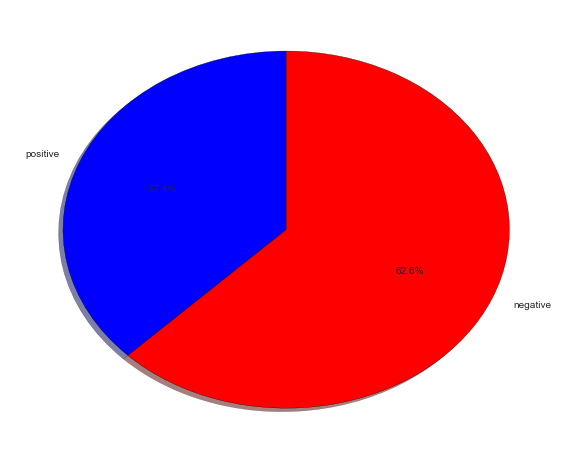

In [23]:
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
plt.pie(values, labels = labels ,colors = col, shadow=True,autopct = '%1.1f%%',startangle= 90)

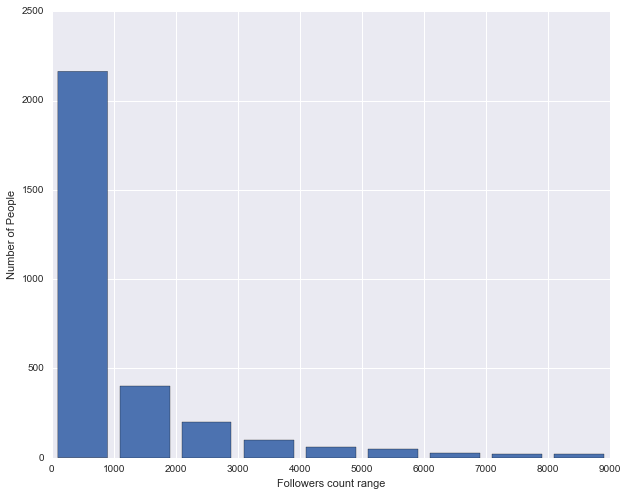

In [24]:
bins = range(0,10000,1000)
plt.hist(data2["followers"],bins,histtype="bar",rwidth=0.8)
plt.xlabel("Followers count range")
plt.ylabel("Number of People")

In [25]:
plt.show()

In [26]:
df2 = data2[data2["followers"]<10000]

In [27]:
len(df2)

3049

In [28]:
counts = range(0,10000,500)
counts

[0,
 500,
 1000,
 1500,
 2000,
 2500,
 3000,
 3500,
 4000,
 4500,
 5000,
 5500,
 6000,
 6500,
 7000,
 7500,
 8000,
 8500,
 9000,
 9500]

In [29]:
hash_pos = {}
hash_neg = {}
for key in counts:
    hash_pos[key] = 0
    hash_neg[key] = 0

In [30]:
hash_pos

{0: 0,
 500: 0,
 1000: 0,
 1500: 0,
 2000: 0,
 2500: 0,
 3000: 0,
 3500: 0,
 4000: 0,
 4500: 0,
 5000: 0,
 5500: 0,
 6000: 0,
 6500: 0,
 7000: 0,
 7500: 0,
 8000: 0,
 8500: 0,
 9000: 0,
 9500: 0}

In [31]:
for i in range(len(data2)):
    a = int(data2["followers"].iloc[i])/500
    if a<=19:
        if data2["sentiment"].iloc[i] == 0:
            hash_neg[(a)*500]+=1
        else:
            hash_pos[(a)*500]+=1
    else:
        if data2["sentiment"].iloc[i] == 0:
            hash_neg[9500]+=1
        else:
            hash_pos[9500]+=1
        

In [32]:
hash_pos

{0: 604,
 500: 188,
 1000: 112,
 1500: 38,
 2000: 47,
 2500: 36,
 3000: 24,
 3500: 10,
 4000: 12,
 4500: 15,
 5000: 10,
 5500: 8,
 6000: 3,
 6500: 8,
 7000: 4,
 7500: 4,
 8000: 4,
 8500: 6,
 9000: 3,
 9500: 65}

In [33]:
hash_neg

{0: 1057,
 500: 315,
 1000: 159,
 1500: 91,
 2000: 61,
 2500: 58,
 3000: 45,
 3500: 22,
 4000: 16,
 4500: 16,
 5000: 16,
 5500: 13,
 6000: 10,
 6500: 6,
 7000: 8,
 7500: 4,
 8000: 5,
 8500: 6,
 9000: 0,
 9500: 98}

In [34]:
positives = np.zeros(20)
negatives = np.zeros(20)

In [35]:
for k,v in hash_pos.items():
    a = k/500
    positives[a] = v

for k,v in hash_neg.items():
    a = k/500
    negatives[a] = v

In [36]:
positives

array([ 604.,  188.,  112.,   38.,   47.,   36.,   24.,   10.,   12.,
         15.,   10.,    8.,    3.,    8.,    4.,    4.,    4.,    6.,
          3.,   65.])

In [37]:
negatives

array([ 1057.,   315.,   159.,    91.,    61.,    58.,    45.,    22.,
          16.,    16.,    16.,    13.,    10.,     6.,     8.,     4.,
           5.,     6.,     0.,    98.])

In [38]:
perc_pos = []
perc_neg = []
for p,n in zip(positives,negatives):
    perp = float(p)/(p+n)
    pern = 1 - perp
    perc_pos.append(perp)
    perc_neg.append(pern)

([<matplotlib.axis.YTick at 0xaa6deb8>,
 <a list of 10 Text yticklabel objects>)

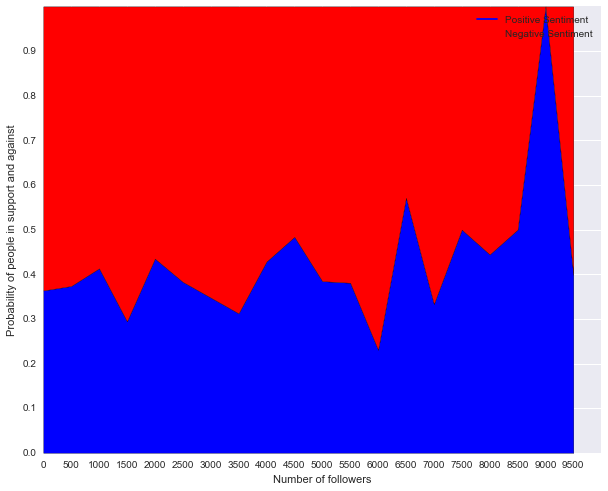

In [39]:
plt.stackplot(counts,perc_pos,perc_neg,colors=["b","r"])
plt.ylabel("Probability of people in support and against")
plt.xlabel("Number of followers")
plt.plot([],[],color="b",label="Positive Sentiment")
plt.plot([],[],color='r',label="Negative Sentiment")
plt.legend()
plt.xticks(counts)
plt.yticks(np.arange(0,1,0.1))

In [40]:
plt.show()

([<matplotlib.axis.XTick at 0xad17518>,
 <a list of 20 Text xticklabel objects>)

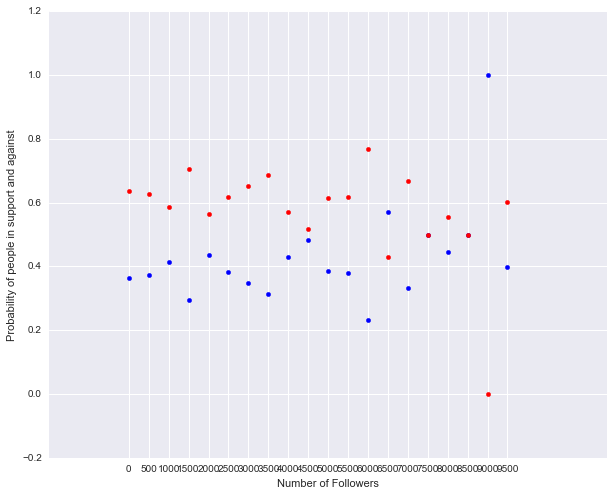

In [41]:
plt.scatter(counts,perc_pos,color='b',label='Positive Sentiments')
plt.scatter(counts,perc_neg,color='r',label='Negative Sentiments')
plt.ylabel("Probability of people in support and against")
plt.xlabel('Number of Followers')
plt.xticks(counts)

In [42]:
plt.show()

In [43]:
np.corrcoef(counts,positives)[0,1]

-0.53475538891411634

In [44]:
np.corrcoef(counts,negatives)[0,1]

-0.53267336710369462

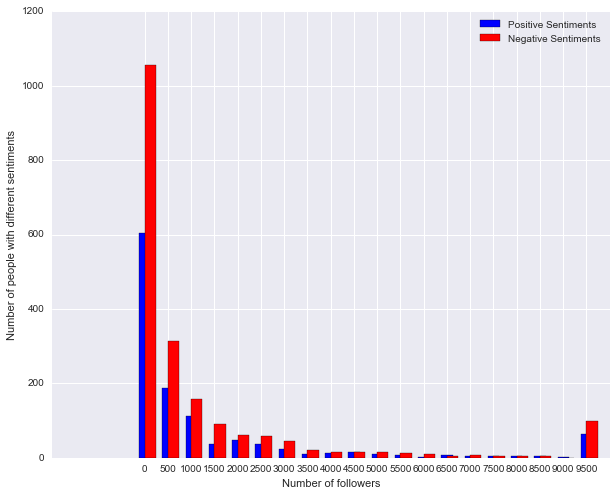

In [45]:
plt.bar(counts,positives,240,color='b',align='center',label='Positive Sentiments')
plt.bar(counts,negatives,240,color='r',label='Negative Sentiments')
plt.xlabel('Number of followers')
plt.ylabel('Number of people with different sentiments')
plt.xticks(counts)
plt.legend()

In [46]:
plt.show()

In [47]:
positives

array([ 604.,  188.,  112.,   38.,   47.,   36.,   24.,   10.,   12.,
         15.,   10.,    8.,    3.,    8.,    4.,    4.,    4.,    6.,
          3.,   65.])

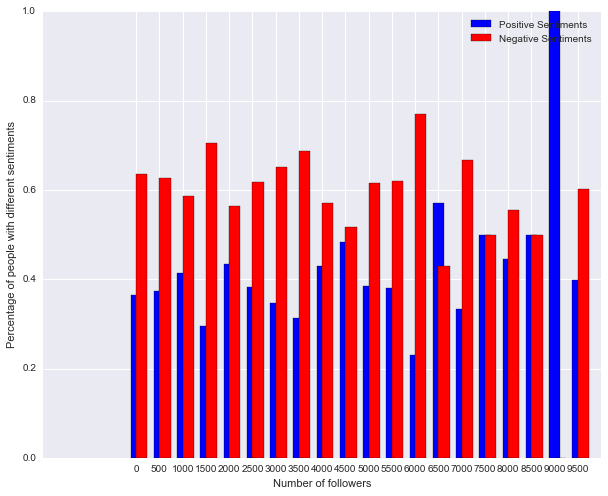

In [48]:
plt.bar(counts,perc_pos,240,color='b',align='center',label='Positive Sentiments')
plt.bar(counts,perc_neg,240,color='r',label='Negative Sentiments')
plt.xlabel('Number of followers')
plt.ylabel('Percentage of people with different sentiments')
plt.xticks(counts)
plt.legend()

In [49]:
plt.show()

In [50]:
s = data2["location"].value_counts()

In [51]:
s[s>4]

London                         89
London, England                51
UK                             41
United Kingdom                 32
England, United Kingdom        30
Australia                      24
Washington, DC                 20
England                        18
United States                  17
London, UK                     16
Sydney                         15
New York, NY                   14
New York                       14
Scotland                       14
Ireland                        13
USA                            12
Singapore                      12
Sydney, Australia              12
San Francisco, CA              11
Dallas, TX                     11
Melbourne, Australia           11
Brooklyn, NY                   11
Los Angeles, CA                11
Earth                          10
Melbourne                      10
القاهرة, مصر                   10
Carlisle                        9
Edinburgh                       8
Scotland, United Kingdom        8
Glasgow       

In [52]:
data2.isnull().sum()

followers           0
hashtags            0
statuses_count      0
retweets            0
favourites          0
date                0
tweet               0
location          726
parsed_tweet        0
sentiment           0
dtype: int64

In [53]:
data3 = data2.dropna(subset = ["location"])

In [54]:
data3.isnull().sum()

followers         0
hashtags          0
statuses_count    0
retweets          0
favourites        0
date              0
tweet             0
location          0
parsed_tweet      0
sentiment         0
dtype: int64

In [55]:
location_pos = {
    "London":0,
    "UK" :0,
    "Australia":0,
    "USA":0,
    "Scotland" : 0,
    "Ireland":0,
    "Singapore" : 0,
    "India" : 0
}
location_neg = {
    "London":0,
    "UK" :0,
    "Australia":0,
    "USA":0,
    "Scotland" : 0,
    "Ireland":0,
    "Singapore" : 0,
    "India" : 0
}
location = {
    "London":0,
    "UK" :0,
    "Australia":0,
    "USA":0,
    "Scotland" : 0,
    "Ireland":0,
    "Singapore" : 0,
    "India" : 0
}


In [56]:
for i in range(len(data3)):
    if "London" in data3["location"].iloc[i] or "England" in data3["location"].iloc[i] or "Manchester" in data3["location"].iloc[i] \
    or "Bretain" in data3["location"].iloc[i]:
        location["London"] +=1
        if data3["sentiment"].iloc[i] == 0:
            location_neg["London"]+=1
        else:
            location_pos["London"]+=1
    elif "United Kingdom" in data3["location"].iloc[i] or "UK" in data3["location"].iloc[i]:
        location["UK"]+=1
        if data3["sentiment"].iloc[i] == 0:
            location_neg["UK"]+=1
        else:
            location_pos["UK"]+=1
    elif "Australia" in data3["location"].iloc[i] or "Sydney" in data3["location"].iloc[i] or "Melbourne" in data3["location"].iloc[i]:
        location["Australia"]+=1
        if data3["sentiment"].iloc[i] == 0:
            location_neg["Australia"]+=1
        else:
            location_pos["Australia"]+=1
    elif "Scotland" in data3["location"].iloc[i]:
        location["Scotland"]+=1
        if data3["sentiment"].iloc[i] == 0:
            location_neg["Scotland"]+=1
        else:
            location_pos["Scotland"]+=1
    elif "Ireland" in data3["location"].iloc[i]:
        location["Ireland"]+=1
        if data3["sentiment"].iloc[i] == 0:
            location_neg["Ireland"]+=1
        else:
            location_pos["Ireland"]+=1
    elif "Singapore" in data3["location"].iloc[i]:
        location["Singapore"]+=1
        if data3["sentiment"].iloc[i] == 0:
            location_neg["Singapore"]+=1
        else:
            location_pos["Singapore"]+=1
    elif "India" in data3["location"].iloc[i]:
        location["India"]+=1
        if data3["sentiment"].iloc[i] == 0:
            location_neg["India"]+=1
        else:
            location_pos["India"]+=1
    elif "DC" in data3["location"].iloc[i] or "United States" in data3["location"].iloc[i] or "New York" in data3["location"].iloc[i] or\
    "USA" in data3["location"].iloc[i] or "CA" in data3["location"].iloc[i] or "TX" in data3["location"].iloc[i] or "NY" in data3["location"].iloc[i]:
        location["USA"]+=1
        if data3["sentiment"].iloc[i] == 0:
            location_neg["USA"]+=1
        else:
            location_pos["USA"]+=1

In [57]:
location_pos

{'Australia': 29,
 'India': 6,
 'Ireland': 12,
 'London': 148,
 'Scotland': 11,
 'Singapore': 6,
 'UK': 68,
 'USA': 117}

In [58]:
location_neg

{'Australia': 83,
 'India': 5,
 'Ireland': 22,
 'London': 255,
 'Scotland': 20,
 'Singapore': 6,
 'UK': 125,
 'USA': 169}

In [59]:
location

{'Australia': 112,
 'India': 11,
 'Ireland': 34,
 'London': 403,
 'Scotland': 31,
 'Singapore': 12,
 'UK': 193,
 'USA': 286}

In [60]:
loc_pos_values = []
loc_pos_keys = []
for k,v in location_pos.items():
    loc_pos_keys.append(k)
    loc_pos_values.append(v)

loc_neg_values = []
loc_neg_keys = []
loc_neg_keys = loc_pos_keys
for k in loc_neg_keys:
    loc_neg_values.append(location_neg[k])

In [61]:
loc_pos_keys

['Ireland',
 'Australia',
 'London',
 'USA',
 'UK',
 'Singapore',
 'India',
 'Scotland']

In [62]:
x = np.arange(len(loc_pos_values))

([<matplotlib.axis.XTick at 0xb3c6a58>,
 <a list of 8 Text xticklabel objects>)

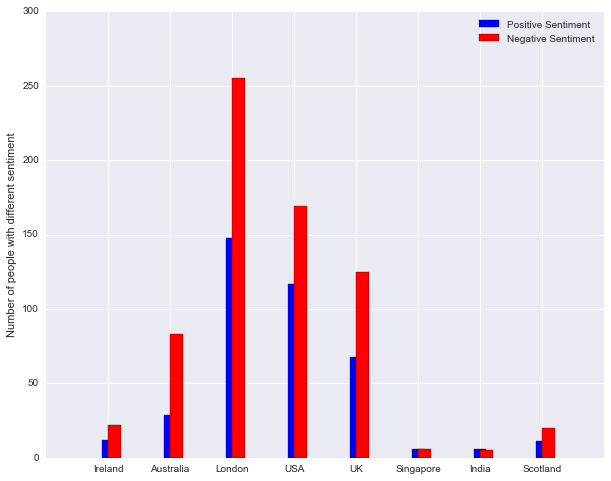

In [63]:
plt.bar(x,loc_pos_values,0.2,color='b',label="Positive Sentiment",align="center")
plt.bar(x,loc_neg_values,0.2,color='r',label="Negative Sentiment")
plt.ylabel("Number of people with different sentiment")
plt.legend()
plt.xticks(x,loc_pos_keys)

In [64]:
plt.show()

In [65]:
loc_pos_values

[12, 29, 148, 117, 68, 6, 6, 11]

In [66]:
loc_neg_values

[22, 83, 255, 169, 125, 6, 5, 20]

In [67]:
loc_pos_perc = []
loc_neg_perc = []
for i in range(len(loc_pos_values)):
    pos_perc = float(loc_pos_values[i])/(loc_pos_values[i] + loc_neg_values[i])
    neg_perc = float(loc_neg_values[i])/(loc_neg_values[i] + loc_pos_values[i])
    loc_pos_perc.append(pos_perc)
    loc_neg_perc.append(neg_perc)

In [68]:
loc_pos_perc

[0.35294117647058826,
 0.25892857142857145,
 0.36724565756823824,
 0.4090909090909091,
 0.35233160621761656,
 0.5,
 0.5454545454545454,
 0.3548387096774194]

In [69]:
loc_neg_perc

[0.6470588235294118,
 0.7410714285714286,
 0.6327543424317618,
 0.5909090909090909,
 0.6476683937823834,
 0.5,
 0.45454545454545453,
 0.6451612903225806]

([<matplotlib.axis.XTick at 0xb5e57b8>,
 <a list of 8 Text xticklabel objects>)

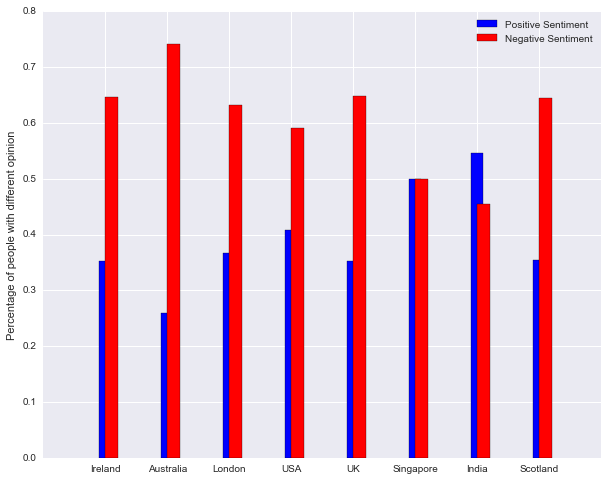

In [70]:
plt.bar(x,loc_pos_perc,0.2,color='b',label = "Positive Sentiment",align = 'center')
plt.bar(x,loc_neg_perc,0.2,color='r',label = "Negative Sentiment")
plt.ylabel("Percentage of people with different opinion")
plt.legend()
plt.xticks(x,loc_pos_keys)

In [71]:
plt.show()